# Collaboration and Competition

---
This notebook demonstrates an eample of robot arms moving to target locations using the Unity ML-Agents environment in partial fullfillment of the third project of the <a href=https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893>Deep Reinforcement Learning Nanodegree program </a>.



### 1. Start the Environment within the Unity workspace
Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
#!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

#env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")
env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [7]:
from maddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import torch
from unityagents import UnityEnvironment

%matplotlib inline

In [8]:
env_info

In [9]:
train_mode = True
env_info = env.reset(train_mode=train_mode)[brain_name] 

In [ ]:
# Number of time steps (1000 max) plays an important role since a high number alllows enough opportunity for exploration.
# But in reality there should be a good balance between exploitation and exploration while training efficiently. 

In [10]:
# MADDPG function
def maddpg(n_episodes=2000, max_t=1000, solved_score=0.5, consecutive_episodes=100, add_noise=True, train_mode=True,
           actor_path='results_actor_ckpt.pth', critic_path='results_critic_ckpt.pth'):  # 2000
    """Multi-Agent Deep Deterministic Policy Gradient (MADDPG)
    Params
    ======
        n_episodes (int)      : maximum number of training episodes
        max_t (int)           : maximum number of timesteps per episode
        train_mode (bool)     : if 'True' set environment to training mode
    """
    best_scores_window = deque(maxlen=consecutive_episodes)
    moving_averages = []
    best_score = -np.inf
    best_scores = []
    best_episode = 0
    solved = False    
    PRINT_EVERY = 10 # Can be made into a parameter


    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]         # reset the environment
        states = np.reshape(env_info.vector_observations, (1,48)) # get states and combine them
        agent_0.reset()
        agent_1.reset()
        scores = np.zeros(num_agents)
        while True:
            actions = get_actions(states, add_noise)           # choose agent actions and combine them
            env_info = env.step(actions)[brain_name]           # send both agents' actions together to the environment
            next_states = np.reshape(env_info.vector_observations, (1, 48)) # combine the agent next states
            rewards = env_info.rewards                         # get reward
            done = env_info.local_done                         # see if episode finished
            agent_0.step(states, actions, rewards[0], next_states, done, 0) # agent 1 learns
            agent_1.step(states, actions, rewards[1], next_states, done, 1) # agent 2 learns
            scores += np.max(rewards)                          # update the score for each agent
            states = next_states                               # roll over states to next time step
            if np.any(done):                                   # exit loop if episode finished
                break
        ep_best_score = np.max(scores)
        best_scores_window.append(ep_best_score)
        best_scores.append(ep_best_score)
        moving_averages.append(np.mean(best_scores_window))
        # save best score                        
        if ep_best_score > best_score:
            best_score = ep_best_score
            best_episode = i_episode
        
        # print results
        if i_episode % PRINT_EVERY == 0:
            print('Episodes {:0>4d}-{:0>4d}\tBest Score: {:.3f}\tMoving Average: {:.3f}'.format(
                i_episode-PRINT_EVERY, i_episode, np.max(best_scores[-PRINT_EVERY:]), moving_averages[-1]))

        # Keep best performing models
        if moving_averages[-1] >= solved_score:
            if not solved:
                print('<-- Environment solved in {:d} episodes! \
                \n<-- Moving Average: {:.3f} over past {:d} episodes'.format(
                    i_episode-consecutive_episodes, moving_averages[-1], consecutive_episodes))
                solved = True
                # save weights
                torch.save(agent_0.actor_local.state_dict(), actor_path)
                torch.save(agent_0.critic_local.state_dict(), critic_path)
            elif ep_best_score >= best_score:
                print('<-- Best episode so far!\
                \nEpisode {:0>4d}\tBest Score: {:.3f}\tMoving Average: {:.3f}'.format(
                i_episode, ep_best_score, moving_averages[-1]))
                # save weights
                torch.save(agent_0.actor_local.state_dict(), actor_path)
                torch.save(agent_0.critic_local.state_dict(), critic_path)
            elif (i_episode-best_episode) >= 200:
                # stop training if model stops converging
                print('<-- Bummer! Training stopped. Achieved score not matched or exceeded in 200 episodes')
                break
            else:
                continue
            
    return best_scores, moving_averages

In [11]:
# In this project the actions of BOTH agents are combined for deciding what actions to take place next.
def get_actions(states, add_noise=True):
    '''gets actions for each agent and then combines them into one array'''
    action_0 = agent_0.act(states, add_noise)    # agent 0 chooses an action
    action_1 = agent_1.act(states, add_noise)    # agent 1 chooses an action
    return np.concatenate((action_0, action_1), axis=0).flatten()

In [12]:
# Run the training loop with the following hyperparamters to submit to Udacity for project acceptance:

# BUFFER_SIZE = int(1e6)  # replay buffer size
# BATCH_SIZE = 128        # minibatch size
# LR_ACTOR = 1e-3         # learning rate of the actor
# LR_CRITIC = 1e-3        # learning rate of the critic
# WEIGHT_DECAY = 0        # L2 weight decay
# LEARN_EVERY = 1         # learning timestep interval
# LEARN_NUM = 1           # number of learning passes
# GAMMA = 0.99            # discount factor
# TAU = 8e-3              # for soft update of target parameters (7e-2)
# OU_SIGMA = 0.2          # Ornstein-Uhlenbeck noise parameter, volatility
# OU_THETA = 0.15         # Ornstein-Uhlenbeck noise parameter, speed of mean reversion (0.12)
# EPS_START = 5.0         # initial value for epsilon in noise decay process in Agent.act() (5.5)
# EPS_EP_END = 300        # episode to end the noise decay process (250)
# EPS_FINAL = 0           # final value for epsilon after decay

# initialize agents
#SOLVED_SCORE = 0.5
CONSEC_EPISODES = 100
##PRINT_EVERY = 10
#ADD_NOISE = True
agent_0 = Agent(state_size, action_size, num_agents=1, random_seed=0)
agent_1 = Agent(state_size, action_size, num_agents=1, random_seed=0)
scores, averages = maddpg(consecutive_episodes=CONSEC_EPISODES,actor_path='results_actor_ckpt.pth', critic_path='results_critic_ckpt.pth')

D:\Users\dobes.zuzana\Analytics\Udacity\project 3 - Collaboration Competition\maddpg_agent.py:124: UserWarning: Using a target size (torch.Size([128, 2])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  critic_loss = F.mse_loss(Q_expected, Q_targets)


Episodes 0000-0010	Best Score: 0.100	Moving Average: 0.010
Episodes 0010-0020	Best Score: 0.000	Moving Average: 0.005
Episodes 0020-0030	Best Score: 0.000	Moving Average: 0.003
Episodes 0030-0040	Best Score: 0.000	Moving Average: 0.003
Episodes 0040-0050	Best Score: 0.100	Moving Average: 0.006
Episodes 0050-0060	Best Score: 0.100	Moving Average: 0.008
Episodes 0060-0070	Best Score: 0.100	Moving Average: 0.011
Episodes 0070-0080	Best Score: 0.200	Moving Average: 0.018
Episodes 0080-0090	Best Score: 0.200	Moving Average: 0.019
Episodes 0090-0100	Best Score: 0.100	Moving Average: 0.020
Episodes 0100-0110	Best Score: 0.100	Moving Average: 0.022
Episodes 0110-0120	Best Score: 0.200	Moving Average: 0.024
Episodes 0120-0130	Best Score: 0.100	Moving Average: 0.028
Episodes 0130-0140	Best Score: 0.200	Moving Average: 0.031
Episodes 0140-0150	Best Score: 0.100	Moving Average: 0.031
Episodes 0150-0160	Best Score: 0.100	Moving Average: 0.031
Episodes 0160-0170	Best Score: 0.100	Moving Average: 0.0

Episodes 1390-1400	Best Score: 0.600	Moving Average: 0.166
Episodes 1400-1410	Best Score: 0.200	Moving Average: 0.164
Episodes 1410-1420	Best Score: 0.300	Moving Average: 0.164
Episodes 1420-1430	Best Score: 0.200	Moving Average: 0.160
Episodes 1430-1440	Best Score: 0.400	Moving Average: 0.159
Episodes 1440-1450	Best Score: 0.200	Moving Average: 0.160
Episodes 1450-1460	Best Score: 0.300	Moving Average: 0.159
Episodes 1460-1470	Best Score: 0.300	Moving Average: 0.154
Episodes 1470-1480	Best Score: 0.200	Moving Average: 0.154
Episodes 1480-1490	Best Score: 0.200	Moving Average: 0.147
Episodes 1490-1500	Best Score: 0.400	Moving Average: 0.143
Episodes 1500-1510	Best Score: 0.400	Moving Average: 0.148
Episodes 1510-1520	Best Score: 0.600	Moving Average: 0.146
Episodes 1520-1530	Best Score: 0.300	Moving Average: 0.148
Episodes 1530-1540	Best Score: 0.300	Moving Average: 0.141
Episodes 1540-1550	Best Score: 0.200	Moving Average: 0.141
Episodes 1550-1560	Best Score: 0.200	Moving Average: 0.1

# Output of initial experiement: (not captured in files - for comparison)
# Was hard to achieve again unfortuntely.

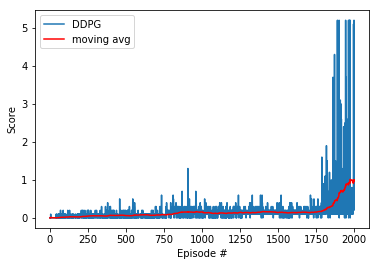

In [14]:
import matplotlib.pyplot as plt
# plot the scores over episodes calculated above
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DDPG')
plt.plot(np.arange(len(averages)), averages, c='r', label='moving avg')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

# Run the agents

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        action_0 = agent_0.act(states[0], add_noise=False).tolist()
        action_1 = agent_1.act(states[1], add_noise=False).tolist()
        actions = [action_0,action_1]
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))